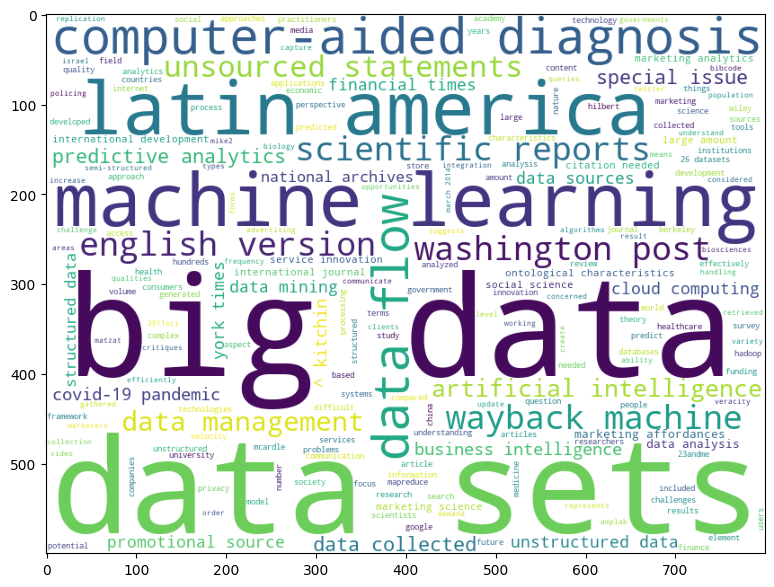

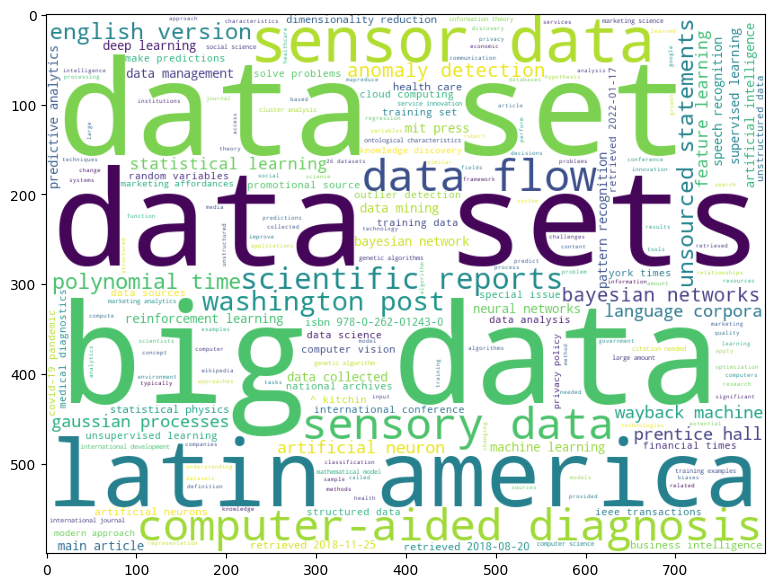

In [1]:
import requests
import sys
from html.parser import HTMLParser
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nlp_rake import Rake

# Function to fetch text content from a Wikipedia page
def fetch_wikipedia_text(url):
    response = requests.get(url)
    response.raise_for_status()
    text = response.content.decode('utf-8')
    return text

# Function to extract text from HTML content
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data) == "" or self.script:
            return
        self.res += ' ' + data.replace('[ edit ]', '')

# Function to generate word cloud and plot it
def generate_word_cloud(text):
    wc = WordCloud(background_color='white', width=800, height=600)
    plt.figure(figsize=(15, 7))
    plt.imshow(wc.generate_from_frequencies({k: v for k, v in text}))
    plt.show()

# Wikipedia URLs for Big Data and Machine Learning
big_data_url = 'https://en.wikipedia.org/wiki/Big_data'
machine_learning_url = 'https://en.wikipedia.org/wiki/Machine_learning'

# Fetch text content from Wikipedia pages
big_data_text = fetch_wikipedia_text(big_data_url)
machine_learning_text = fetch_wikipedia_text(machine_learning_url)

# Extract text from HTML content
parser = MyHTMLParser()
parser.feed(big_data_text)
big_data_text = parser.res
parser.feed(machine_learning_text)
machine_learning_text = parser.res

# Apply keyword extraction using nlp_rake
extractor = Rake(max_words=2, min_freq=3, min_chars=5)
big_data_keywords = extractor.apply(big_data_text)
machine_learning_keywords = extractor.apply(machine_learning_text)

# Plot word clouds for Big Data and Machine Learning
generate_word_cloud(big_data_keywords)
generate_word_cloud(machine_learning_keywords)
